In [160]:
import pandas as pd

## Gold line

In [161]:
df_gold = pd.read_excel("2018-2019 Gold Data (1).xlsx")

In [162]:
df_gold

,Stop,DailyAvgOn,DailyAvgOff,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Fretwell N,32.88,21.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Union Deck/Belk N,25.18,16.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Wallis Hall E/Light Rail,86.63,63.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Student Union W,88.82,85.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hickory Hall South,12.85,8.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Levine Hall W,33.66,74.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fretwell S,63.98,65.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Foundation Bldg. North,11.48,10.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Foundation Bldg. South,22.91,19.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Harris Alumni Center North,9.01,2.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df_gold = df_gold.iloc[:,:3]

In [104]:
df_gold

,Stop,DailyAvgOn,DailyAvgOff
0,Fretwell N,32.88,21.27
1,Union Deck/Belk N,25.18,16.05
2,Wallis Hall E/Light Rail,86.63,63.11
3,Student Union W,88.82,85.03
4,Hickory Hall South,12.85,8.94
5,Levine Hall W,33.66,74.11
6,Fretwell S,63.98,65.37
7,Foundation Bldg. North,11.48,10.25
8,Foundation Bldg. South,22.91,19.59
9,Harris Alumni Center North,9.01,2.56


In [105]:
X = df_gold.iloc[:,1:]

In [106]:
X

,DailyAvgOn,DailyAvgOff
0,32.88,21.27
1,25.18,16.05
2,86.63,63.11
3,88.82,85.03
4,12.85,8.94
5,33.66,74.11
6,63.98,65.37
7,11.48,10.25
8,22.91,19.59
9,9.01,2.56


In [107]:
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
df_silhouette = pd.DataFrame({'ss_score':[],'n_cluster':[]})
for i in range(2,10):
    km = KMeans(n_clusters = i, init = 'random', max_iter = 50, n_init = 10, random_state = 42)
    cluster_labels = km.fit_predict(X)
    ss_avg = metrics.silhouette_score(X, cluster_labels)
    df_silhouette = df_silhouette.append({'ss_score':ss_avg, 'n_cluster':i}, ignore_index = True)

,ss_score,n_cluster
0,0.720804,2.0
1,0.514892,3.0
2,0.489248,4.0
3,0.442287,5.0
4,0.446734,6.0
5,0.398695,7.0
6,0.423413,8.0
7,0.284604,9.0


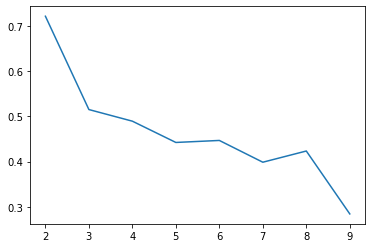

In [108]:
import matplotlib.pyplot as plt
display(df_silhouette)
df_silhouette.set_index('n_cluster', inplace = True)
plt.plot(df_silhouette['ss_score'])

In [111]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [112]:
kmeans.labels_

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

In [113]:
X['cluster_label'] = kmeans.labels_

In [114]:
X['cluster_label'].unique()

array([0, 1], dtype=int32)

In [115]:
X_km_mean = X.copy()

In [116]:
X_km_mean.groupby('cluster_label').mean()

,DailyAvgOn,DailyAvgOff
cluster_label,,
0,16.601111,13.597778
1,71.762000,77.316000


In [62]:
pca_df = pd.DataFrame(X)
pca_df

,DailyAvgOn,DailyAvgOff,cluster_label
0,32.88,21.27,0
1,25.18,16.05,0
2,86.63,63.11,1
3,88.82,85.03,1
4,12.85,8.94,0
5,33.66,74.11,1
6,63.98,65.37,1
7,11.48,10.25,0
8,22.91,19.59,0
9,9.01,2.56,0


In [117]:
T = df_gold.iloc[:,:2]
T

,Stop,DailyAvgOn
0,Fretwell N,32.88
1,Union Deck/Belk N,25.18
2,Wallis Hall E/Light Rail,86.63
3,Student Union W,88.82
4,Hickory Hall South,12.85
5,Levine Hall W,33.66
6,Fretwell S,63.98
7,Foundation Bldg. North,11.48
8,Foundation Bldg. South,22.91
9,Harris Alumni Center North,9.01


In [118]:
df1 = pd.merge(T, pca_df)
df1

,Stop,DailyAvgOn,DailyAvgOff,cluster_label
0,Fretwell N,32.88,21.27,0
1,Union Deck/Belk N,25.18,16.05,0
2,Wallis Hall E/Light Rail,86.63,63.11,1
3,Student Union W,88.82,85.03,1
4,Hickory Hall South,12.85,8.94,0
5,Levine Hall W,33.66,74.11,1
6,Fretwell S,63.98,65.37,1
7,Foundation Bldg. North,11.48,10.25,0
8,Foundation Bldg. South,22.91,19.59,0
9,Harris Alumni Center North,9.01,2.56,0


## Green line

In [119]:
df_green = pd.read_excel("2018-2019 GREEN Data.xlsx")

In [120]:
df_green

,Stops,DailyAvgOn,DailyAvgOff
0,Cone Deck W,35.351351,46.945946
1,Wallis Hall W/Light Rail,98.924324,88.881081
2,Student Union E,160.459459,89.064865
3,Aux Services East,13.962162,20.054054
4,Robinson Hall S,11.059459,34.091892
5,Student Health N,163.059459,167.875676
6,Student Health (Green) W,38.686486,42.481081
7,Reese East,18.816216,43.416216
8,Robinson Hall N,14.518919,13.875676
9,Cato Hall N,11.756757,38.589189


In [121]:
df_green.drop(23)

,Stops,DailyAvgOn,DailyAvgOff
0,Cone Deck W,35.351351,46.945946
1,Wallis Hall W/Light Rail,98.924324,88.881081
2,Student Union E,160.459459,89.064865
3,Aux Services East,13.962162,20.054054
4,Robinson Hall S,11.059459,34.091892
5,Student Health N,163.059459,167.875676
6,Student Health (Green) W,38.686486,42.481081
7,Reese East,18.816216,43.416216
8,Robinson Hall N,14.518919,13.875676
9,Cato Hall N,11.756757,38.589189


In [133]:
X_green = df_green.iloc[:,1:]
X_green = X_green.drop(23)
X_green

,DailyAvgOn,DailyAvgOff
0,35.351351,46.945946
1,98.924324,88.881081
2,160.459459,89.064865
3,13.962162,20.054054
4,11.059459,34.091892
5,163.059459,167.875676
6,38.686486,42.481081
7,18.816216,43.416216
8,14.518919,13.875676
9,11.756757,38.589189


,ss_score,n_cluster
0,0.756534,2.0
1,0.452377,3.0
2,0.417873,4.0
3,0.484303,5.0
4,0.430473,6.0
5,0.486994,7.0
6,0.443885,8.0
7,0.263949,9.0


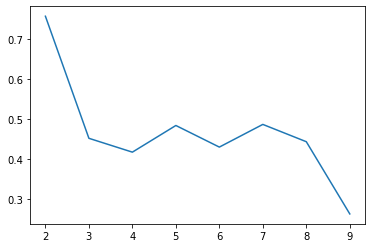

In [134]:
df_silhouette = pd.DataFrame({'ss_score':[],'n_cluster':[]})
for i in range(2,10):
    km = KMeans(n_clusters = i, init = 'random', max_iter = 50, n_init = 10, random_state = 42)
    cluster_labels = km.fit_predict(X_green)
    ss_avg = metrics.silhouette_score(X_green, cluster_labels)
    df_silhouette = df_silhouette.append({'ss_score':ss_avg, 'n_cluster':i}, ignore_index = True)
display(df_silhouette)
df_silhouette.set_index('n_cluster', inplace = True)
plt.plot(df_silhouette['ss_score'])

In [135]:
kmeans_green = KMeans(n_clusters=2, random_state=0)
kmeans_green.fit(X_green)

KMeans(n_clusters=2, random_state=0)

In [136]:
X_green['cluster_label'] = kmeans_green.labels_

In [137]:
X_green_km_mean = X_green.copy()

In [138]:
X_green_km_mean.groupby('cluster_label').mean()

,DailyAvgOn,DailyAvgOff
cluster_label,,
0,18.640398,25.116643
1,147.950000,118.294595


In [139]:
pca_df_green = pd.DataFrame(X_green)
pca_df_green

,DailyAvgOn,DailyAvgOff,cluster_label
0,35.351351,46.945946,0
1,98.924324,88.881081,1
2,160.459459,89.064865,1
3,13.962162,20.054054,0
4,11.059459,34.091892,0
5,163.059459,167.875676,1
6,38.686486,42.481081,0
7,18.816216,43.416216,0
8,14.518919,13.875676,0
9,11.756757,38.589189,0


In [140]:
T_green = df_green.iloc[:,:2]
T_green = T_green.drop(23)

In [159]:
df1_green = pd.merge(T_green, pca_df_green)
df1_green

,Stops,DailyAvgOn,DailyAvgOff,cluster_label
0,Cone Deck W,35.351351,46.945946,0
1,Wallis Hall W/Light Rail,98.924324,88.881081,1
2,Student Union E,160.459459,89.064865,1
3,Aux Services East,13.962162,20.054054,0
4,Robinson Hall S,11.059459,34.091892,0
5,Student Health N,163.059459,167.875676,1
6,Student Health (Green) W,38.686486,42.481081,0
7,Reese East,18.816216,43.416216,0
8,Robinson Hall N,14.518919,13.875676,0
9,Cato Hall N,11.756757,38.589189,0


## Silver line

In [146]:
df_silver = pd.read_excel("2018-2019 SILVER Data.xlsx")

In [147]:
df_silver

,Stops,DailyAvgOn,DailyAvgOff
0,Athletics Complex E,20.925501,10.805158
1,Athletics Complex W,25.395415,141.343840
2,Aux Services East,98.048711,137.991404
3,Aux Services West,66.498567,72.899713
4,CRI Deck,213.484241,202.773639
5,Duke Centennial Hall East,193.710602,8.169054
6,EPIC N,146.057307,7.885387
7,EPIC S,8.020057,83.724928
8,East Deck 2,19.077364,25.498567
9,Fretwell N,89.318052,144.157593


In [148]:
df_silver = df_silver.drop(28)

In [149]:
df_silver

,Stops,DailyAvgOn,DailyAvgOff
0,Athletics Complex E,20.925501,10.805158
1,Athletics Complex W,25.395415,141.343840
2,Aux Services East,98.048711,137.991404
3,Aux Services West,66.498567,72.899713
4,CRI Deck,213.484241,202.773639
5,Duke Centennial Hall East,193.710602,8.169054
6,EPIC N,146.057307,7.885387
7,EPIC S,8.020057,83.724928
8,East Deck 2,19.077364,25.498567
9,Fretwell N,89.318052,144.157593


In [150]:
X_silver = df_silver.iloc[:,1:]
X_silver

,DailyAvgOn,DailyAvgOff
0,20.925501,10.805158
1,25.395415,141.343840
2,98.048711,137.991404
3,66.498567,72.899713
4,213.484241,202.773639
5,193.710602,8.169054
6,146.057307,7.885387
7,8.020057,83.724928
8,19.077364,25.498567
9,89.318052,144.157593


,ss_score,n_cluster
0,0.580604,2.0
1,0.532611,3.0
2,0.545530,4.0
3,0.549318,5.0
4,0.541708,6.0
5,0.466482,7.0
6,0.478760,8.0
7,0.415761,9.0


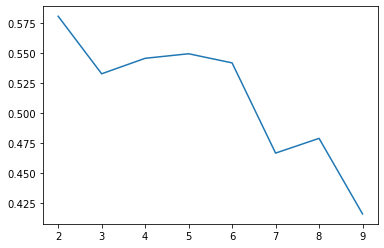

In [151]:
df_silhouette = pd.DataFrame({'ss_score':[],'n_cluster':[]})
for i in range(2,10):
    km = KMeans(n_clusters = i, init = 'random', max_iter = 50, n_init = 10, random_state = 42)
    cluster_labels = km.fit_predict(X_silver)
    ss_avg = metrics.silhouette_score(X_silver, cluster_labels)
    df_silhouette = df_silhouette.append({'ss_score':ss_avg, 'n_cluster':i}, ignore_index = True)
display(df_silhouette)
df_silhouette.set_index('n_cluster', inplace = True)
plt.plot(df_silhouette['ss_score'])

In [152]:
kmeans_silver = KMeans(n_clusters=2, random_state=0)
kmeans_silver.fit(X_silver)

KMeans(n_clusters=2, random_state=0)

In [153]:
X_silver['cluster_label'] = kmeans_silver.labels_

In [154]:
X_silver_km_mean = X_silver.copy()

In [155]:
X_silver_km_mean.groupby('cluster_label').mean()

,DailyAvgOn,DailyAvgOff
cluster_label,,
0,45.686451,46.949379
1,232.097831,223.272206


In [156]:
pca_df_silver = pd.DataFrame(X_silver)
pca_df_silver

,DailyAvgOn,DailyAvgOff,cluster_label
0,20.925501,10.805158,0
1,25.395415,141.343840,0
2,98.048711,137.991404,0
3,66.498567,72.899713,0
4,213.484241,202.773639,1
5,193.710602,8.169054,0
6,146.057307,7.885387,0
7,8.020057,83.724928,0
8,19.077364,25.498567,0
9,89.318052,144.157593,0


In [157]:
T_silver = df_silver.iloc[:,:2]
T_silver = T_silver.drop(23)

In [158]:
df1_silver = pd.merge(T_silver, pca_df_silver)
df1_silver

,Stops,DailyAvgOn,DailyAvgOff,cluster_label
0,Athletics Complex E,20.925501,10.805158,0
1,Athletics Complex W,25.395415,141.343840,0
2,Aux Services East,98.048711,137.991404,0
3,Aux Services West,66.498567,72.899713,0
4,CRI Deck,213.484241,202.773639,1
5,Duke Centennial Hall East,193.710602,8.169054,0
6,EPIC N,146.057307,7.885387,0
7,EPIC S,8.020057,83.724928,0
8,East Deck 2,19.077364,25.498567,0
9,Fretwell N,89.318052,144.157593,0
